In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

data = pd.read_csv("/home/machouba/Documents/CC_42/Train_knight.csv")
data['knight'] = data['knight'].map({'Jedi': 1, 'Sith': 0})

data

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,0
1,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,1
2,10.970,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,0
3,11.620,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,0
4,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,...,15.40,59.90,274.9,0.1733,0.12390,0.11680,0.04419,0.3220,0.09026,0
394,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191,0
395,11.640,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,0.1801,0.06520,...,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097,0
396,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,...,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490,0


In [21]:
X = data.drop(columns=['knight'], axis=1)
y = data['knight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


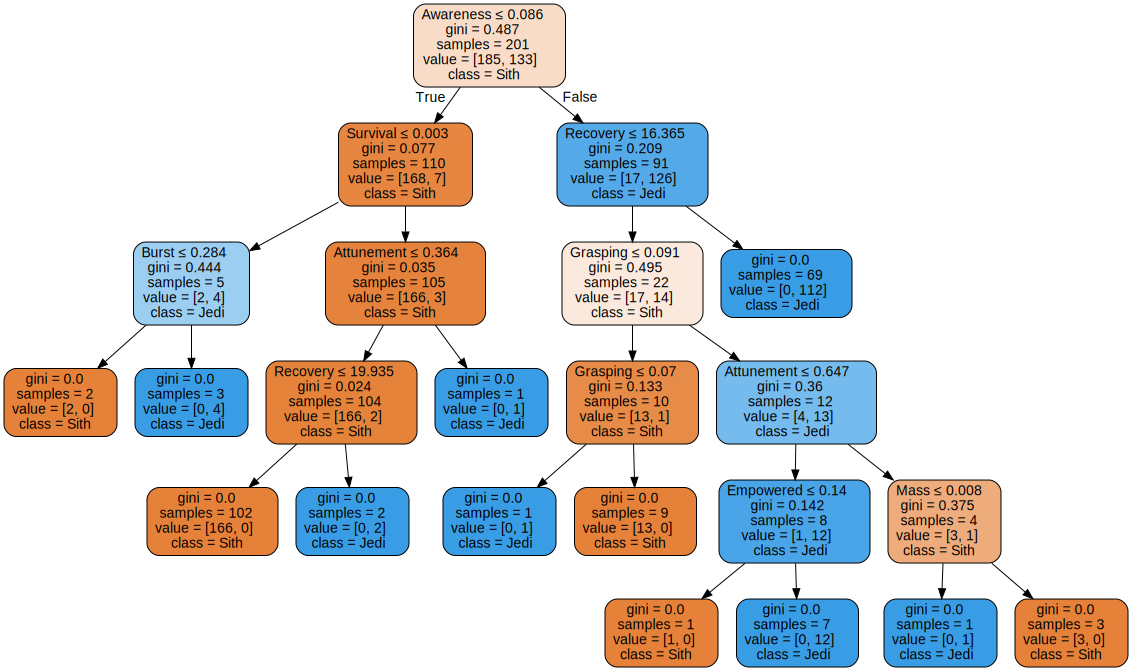

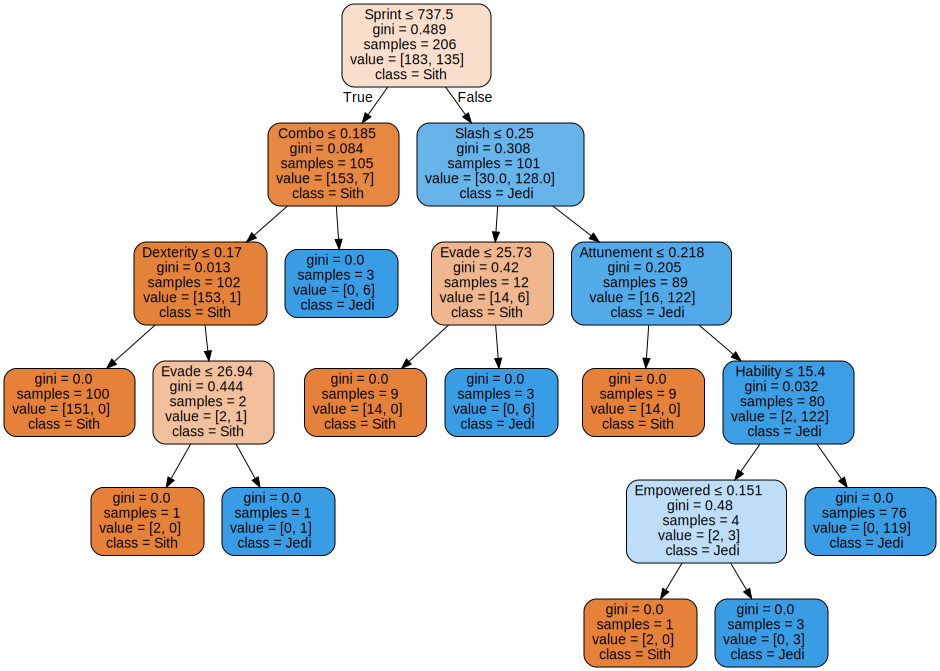

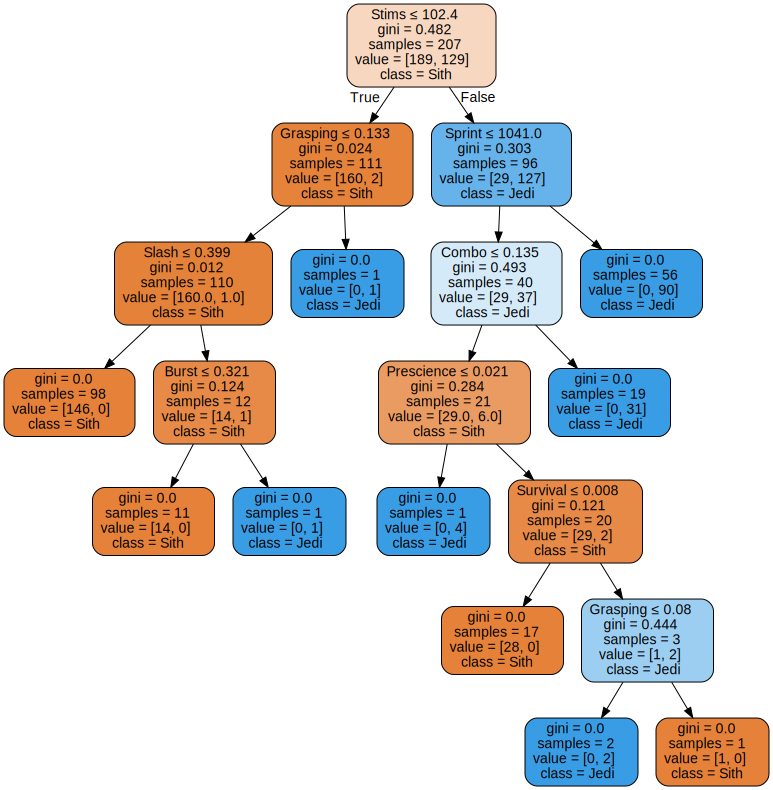

In [23]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=X.columns,
                               class_names=['Sith', 'Jedi'],
                               filled=True, rounded=True, 
                               special_characters=True)
    graph = graphviz.Source(dot_data) 
    display(graph)  # Displays the tree in the notebook

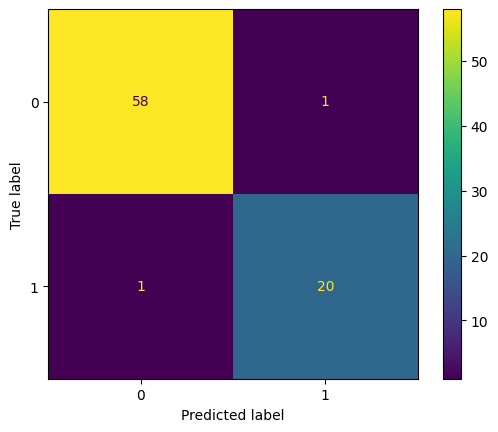

In [24]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

F1 = 2 * (recall * precision) / (recall + precision)

print("Accuracy:", accuracy*100, "%")
print("Precision:", precision*100, "%")
print("Recall:", recall*100, "%")
print("F1 Score:", F1*100, "%")

Accuracy: 97.5 %
Precision: 95.23809523809523 %
Recall: 95.23809523809523 %
F1 Score: 95.23809523809523 %


In [26]:
data_test = pd.read_csv("/home/machouba/Documents/CC_42/Test_knight.csv")

In [34]:
result = rf.predict(data_test)
result = pd.DataFrame(result, columns=['knight'])
result['knight'] = result['knight'].map({1: 'Jedi', 0: 'Sith'})

result.to_csv("tree.txt", index=False, header=False)